In [44]:
import earlybadetection as eab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from rasterio.features import shapes, rasterize
import geopandas as gpd
from tqdm import tqdm

In [3]:
df = eab.generate_data_frame(2024,'21KWU',30)

/home/queimadas/miniconda3/envs/bdclab/lib/python3.10/site-packages/pystac_client/item_search.py:903: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


In [10]:
df['dates_before'] = pd.to_datetime(df['dates_before'])
df_filtered = df[df['dates_before'] > '2024-07-15']
df_filtered

,dates_before,dates_after,item_before,item_after,href_b8a_before,href_b8a_after,href_b11_before,href_b11_after,href_b12_before,href_b12_after,href_scl_before,href_scl_after
42,2024-07-19,2024-07-21,S2A_MSIL2A_20240719T135701_N0510_R067_T21KWU_2...,S2B_MSIL2A_20240721T134709_N0510_R024_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
43,2024-07-19,2024-07-21,S2A_MSIL2A_20240719T135701_N0510_R067_T21KWU_2...,S2B_MSIL2A_20240721T134709_N0510_R024_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
44,2024-07-21,2024-07-24,S2B_MSIL2A_20240721T134709_N0510_R024_T21KWU_2...,S2B_MSIL2A_20240724T135709_N0511_R067_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
45,2024-07-24,2024-07-26,S2B_MSIL2A_20240724T135709_N0511_R067_T21KWU_2...,S2A_MSIL2A_20240726T134711_N0511_R024_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
46,2024-07-26,2024-07-29,S2A_MSIL2A_20240726T134711_N0511_R024_T21KWU_2...,S2A_MSIL2A_20240729T140051_N0511_R067_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
47,2024-07-29,2024-07-31,S2A_MSIL2A_20240729T140051_N0511_R067_T21KWU_2...,S2B_MSIL2A_20240731T134709_N0511_R024_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
48,2024-07-31,2024-08-03,S2B_MSIL2A_20240731T134709_N0511_R024_T21KWU_2...,S2B_MSIL2A_20240803T135709_N0511_R067_T21KWU_2...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...,https://data.inpe.br/bdc/data/S2_L2A/v001/21/K...
49,2024-08-03,2024-08-05,S2B_MSIL2A_20240803T135709_N0511_R067_T21KWU_2...,S2A_MSIL2A_20240805T134711_N0511_R024_T21KWU_2...,https://data.inpe.br/bdc/da

In [5]:
ba_files = []
day_before_files = []
day_after_files = []
item_before_files = []
item_after_files = []
focos_in_the_area = []
touch_foco=[]
pixels_sum_value = []

In [ ]:

asset_exemple = 60
scl_before = df.iloc[asset_exemple, 10]
scl_after = df.iloc[asset_exemple, 11]
href_b12_before = df.iloc[asset_exemple, 8]
href_b12_after = df.iloc[asset_exemple, 9]
href_b11_before = df.iloc[asset_exemple, 6]
href_b11_after = df.iloc[asset_exemple, 7]
href_b8a_before = df.iloc[asset_exemple, 4]
href_b8a_after = df.iloc[asset_exemple, 5]
item_before = df.iloc[asset_exemple, 2]
item_after = df.iloc[asset_exemple, 3]
dates_before = df.iloc[asset_exemple, 0]
dates_after = df.iloc[asset_exemple, 1]

dscl, transform, crs_original, bbox_4326 = eab.calculate_dscl(scl_before, scl_after)
dnbr_mask, dnbr_swir_mask, bbox_4326 = eab.dnbr_and_dnbr_swir(
    dscl, 
    href_b8a_before, href_b11_before, href_b12_before, 
    href_b8a_after, href_b11_after, href_b12_after
)

year = str(dates_before.year)
first_month = f"{dates_before.month:02d}"  
first_day = f"{dates_before.day:02d}"

year = str(dates_after.year) 
second_month = f"{dates_after.month:02d}" 
second_day = f"{dates_after.day:02d}" 

# Gera buffers e máscaras rasterizadas para focos de incêndio
focos, focos_size = eab.cluster_fire_spots(bbox_4326, year, first_month, first_day, second_month, second_day)

/home/queimadas/miniconda3/envs/bdclab/lib/python3.10/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [55]:
focos_size=int(focos_size)
focos = focos.to_crs(epsg=f'{crs_original.to_epsg()}')
focos_buffer = focos.buffer(300)

gdf_focos_buffer = gpd.GeoDataFrame(geometry=focos_buffer, crs=focos.crs)
focos_buffer_mask = gdf_focos_buffer.dissolve()
focos_shapes = ((geom, 1,) for geom in focos_buffer_mask.geometry)
focos_buffer_mask_rasterized = rasterize(focos_shapes, out_shape=dnbr_swir_mask.shape, transform=transform)

# Calcula imagem modificada
image_modified = dnbr_mask * dnbr_swir_mask * focos_buffer_mask_rasterized
# Aplica a condição para gerar a máscara final
image_conditioned = np.where(image_modified == 0, 1, np.nan)
focos_buffer_4326 = gdf_focos_buffer
focos_buffer_4326.columns


count_intersect = 0
for _, poligono in tqdm(focos_buffer_4326.iterrows()):
    # Criar máscara com a geometria do polígono
    poligono = rasterize(poligono, out_shape=dnbr_swir_mask.shape, transform=transform)

    # Criar uma máscara do raster usando a geometria
    # out_image, out_transform = mask(image_modified_4326, geom, crop=True)
    geometria = np.nansum(poligono * dnbr_mask * dnbr_swir_mask)
    # Verificar se há valores diferentes de NoData (indicando interseção)
    if np.any(geometria):
        count_intersect += 1
Focos_touchs =count_intersect
# Soma os valores diferentes de NaN
sum_values = np.nansum(image_conditioned)
pixels_sum = int(sum_values)
file_in_the_df = asset_exemple

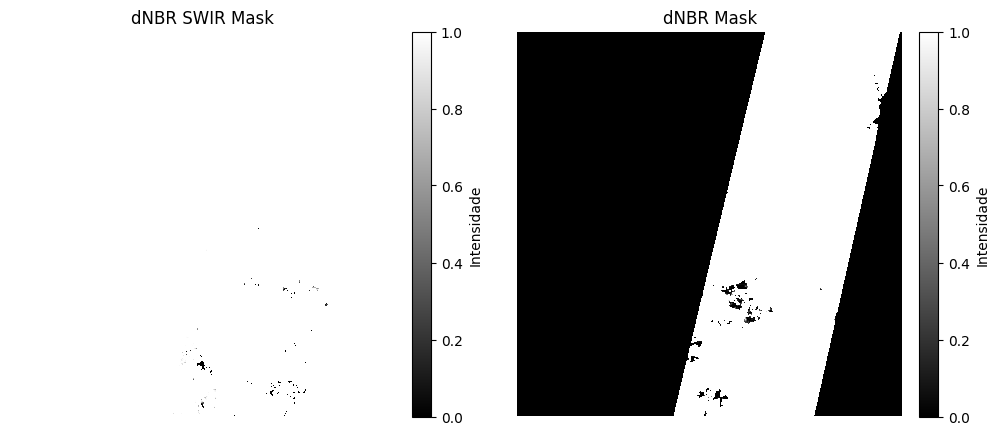

In [58]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Primeira imagem
img1 = ax[0].imshow(np.sqrt((dnbr_swir_mask -1)*(dnbr_swir_mask -1)), cmap="gray")
ax[0].axis("off")
ax[0].set_title("dNBR SWIR Mask")

# Adicionar colorbar para a primeira imagem
cbar1 = fig.colorbar(img1, ax=ax[0], fraction=0.046, pad=0.04)
cbar1.set_label("Intensidade")

# Segunda imagem
img2 = ax[1].imshow(dnbr_mask, cmap="gray")
ax[1].axis("off")
ax[1].set_title("dNBR Mask")

# Adicionar colorbar para a segunda imagem
cbar2 = fig.colorbar(img2, ax=ax[1], fraction=0.046, pad=0.04)
cbar2.set_label("Intensidade")

# Exibir as imagens
plt.show()


In [31]:
import cv2

cv2.imwrite("imagem_salva.jpg", image_conditioned)  # Salva como JPG


[ WARN:0@0.011] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.


True